<a href="https://colab.research.google.com/github/Karkess/NuclearNotes/blob/main/FinitePotentialWellManim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation and Test


In [1]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,855 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,594 kB]
Fetched 5,577 kB in 4s (1,306 kB/s)
Reading packag

In [2]:
from manim import *

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [10]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Manim Community v0.19.0

#Finite Potential Well

In [ ]:
%%manim -p -qk -v WARNING FiniteWellIntro

class FiniteWellIntro(Scene):
    def construct(self):
        # --- Equation ---
        S_eq = MathTex(
            r"-\frac{\hbar}{2m}\frac{d^2\psi}{dx^2}+V(X)\psi(X)=E\psi(X)",
            color=TEAL,
            substrings_to_isolate=[r"V(X)"]
        ).scale(1).shift(UP*2)

        # --- Piecewise Definition ---
        V_x = MathTex(
            r"V(X) = \begin{cases}"
            r"V_0, & |X| > \frac{a}{2} \\"
            r"0, & |X| < \frac{a}{2}"
            r"\end{cases}",
            color=PINK
        ).scale(0.7)

        # --- Plot Axes ---
        axes = Axes(
            x_range=[0, 8, 1],
            y_range=[0, 6, 1],
            x_length=7,
            y_length=3,
            axis_config={"include_numbers": False, "font_size": 24}
        )
        labels = axes.get_axis_labels(x_label="a", y_label="E")

        # Define parameters
        a = 2  # width of the well
        V0 = 4  # height outside

        # Define potential function (piecewise)
        def potential(x):
            return 0 if abs(x-4) < a/2 else V0

        # Plot potential curve
        V_plot = axes.plot(potential,
        color=PINK,
        use_smoothing=False,
        dt=0.01,
        discontinuities=[3, 5]
        )

        # Create horizontal line for outside potential (flat top)
        # Fill effect optional
        shaded = axes.get_area(V_plot, [0, 8], color=PINK, opacity=0.15)


        # --- Things positions ---
        V_x.move_to([-4,-1.5,0])
        # --- Animation sequence ---
        self.play(Write(S_eq))
        self.wait(1)

        self.play(S_eq.get_part_by_tex(r"V(X)").animate.set_color(PINK), run_time=1.2)
        self.wait(1.5)

        self.play(Write(V_x))
        self.wait(1.5)

        # Position axes below
        axes_group = VGroup(axes, labels, V_plot, shaded)
        axes_group.move_to([2,-1,0])
        # --- Labels under the x-axis ---
        label_left = MathTex(r"-\tfrac{a}{2}")
        label_right = MathTex(r"\tfrac{a}{2}")
        label_v0 = MathTex(r"V_0", color=PINK)

        # Position them using axes coordinates
        # (3 and 5 correspond to your |X| > a/2 boundaries)
        label_left.next_to(axes.c2p(3, 0), DOWN, buff=0.25)
        label_right.next_to(axes.c2p(5, 0), DOWN, buff=0.25)
        label_v0.next_to(axes.c2p(8, 4), RIGHT, buff=0.25)

        # --- Animation sequence ---

        self.play(Create(axes), Write(labels))
        self.play(Create(V_plot), FadeIn(shaded))
        self.play(Write(label_left), Write(label_right), Write(label_v0))
        self.wait(2)

        self.play(FadeOut(V_x), FadeOut(S_eq))
        self.wait(2)

        EnLine = MathTex(r"E < V_0")
        EnLine[0][0].set_color(TEAL)
        EnLine[0][2:4].set_color(PINK)
        EnLine.move_to([-4,-1.5,0])
        self.play(Write(EnLine))
        self.wait(1)

        E_line = DashedLine(
            axes.c2p(0, 4),
            axes.c2p(8, 4),
            color=TEAL,
            dash_length=0.2,     # tweak dash size
            dashed_ratio=0.5     # dash:gap ratio
        )

        E_label = MathTex("E", color=TEAL).next_to(axes.c2p(0, 4), LEFT, buff=0.3)

        self.play(Create(E_line), Write(E_label))
        self.wait(2)

        axes_group = VGroup(
            axes,
            labels,
            V_plot,
            shaded,
            label_left,
            label_right,
            label_v0,
            E_line,
            E_label
        )

        self.play(FadeOut(EnLine), axes_group.animate.move_to([0,-1.5,0]))
        self.wait(2)

        Area_I = MathTex(r"\mathrm{I}").next_to(axes.c2p(1.2, 2))
        Area_II = MathTex(r"\mathrm{II}").next_to(axes.c2p(3.5, 2))
        Area_III = MathTex(r"\mathrm{III}").next_to(axes.c2p(6, 2))

        Psi_I = MathTex(r"\psi_I = A e^{ k_1 x}+Be^{- k_1 x}", color=TEAL).move_to([-3,2.8,0])
        Psi_II = MathTex(r"\psi_{II} = C e^{i k_2 x}+De^{-i k_2 x}", color=TEAL).move_to([0,2,0])
        Psi_III = MathTex(r"\psi_{III} = F e^{ k_1 x}+Ge^{- k_1 x}", color=TEAL).move_to([3,1.2,0])

        self.play(Write(Psi_I), Write(Psi_II), Write(Psi_III))
        self.play(Write(Area_I), Write(Area_II), Write(Area_III))
        self.wait(2)

        self.play(FadeOut(axes_group), FadeOut(Area_I), FadeOut(Area_II), FadeOut(Area_III))

        self.wait(2)
        self.play(Psi_I[0][5:7].animate.set_color(YELLOW),
                  Psi_I[0][12:14].animate.set_color(YELLOW),
                  Psi_II[0][7:9].animate.set_color(ORANGE),
                  Psi_II[0][15:17].animate.set_color(ORANGE),
                  Psi_III[0][7:9].animate.set_color(YELLOW),
                  Psi_III[0][14:16].animate.set_color(YELLOW),
                  run_time=1.2
                  )
        k_1=MathTex(r"k_1=\sqrt{2m(V_0-E)/\hbar^2}",color=YELLOW).move_to([0,-1,0])
        k_2=MathTex(r"k_2=\sqrt{2mE/\hbar^2}",color=ORANGE).move_to([0,-2,0])
        self.play(Write(k_1), Write(k_2))
        self.wait(2)

        self.play(Psi_I[0][5:7].animate.set_color(TEAL),
                  Psi_I[0][12:14].animate.set_color(TEAL),
                  Psi_II[0][7:9].animate.set_color(TEAL),
                  Psi_II[0][15:17].animate.set_color(TEAL),
                  Psi_III[0][7:9].animate.set_color(TEAL),
                  Psi_III[0][14:16].animate.set_color(TEAL),
                  run_time=1.2
                  )
        self.wait(2)

        self.play(FadeOut(k_1), FadeOut(k_2))
        self.play(Psi_I[0][9].animate.set_color(YELLOW),
                  Psi_III[0][5].animate.set_color(ORANGE),
                  run_time=1.2
                  )
        B0 = MathTex(r"\psi_I\to 0 \text{ when } x\to -\infty \\ \therefore B=0", color=YELLOW).move_to([-3,-1,0])
        F0 = MathTex(r"\psi_{III}\to 0 \text{ when } x\to \infty \\ \therefore F=0", color=ORANGE).move_to([3,-3,0])
        self.play(Write(B0), Write(F0))
        self.wait(2)

        Psi_I_new = MathTex(r"\psi_I = A e^{ k_1 x}", color=TEAL).move_to(Psi_I)
        Psi_III_new = MathTex(r"\psi_{III} = G e^{- k_1 x}", color=TEAL).move_to(Psi_III)

        self.play(TransformMatchingTex(Psi_I, Psi_I_new), run_time=1.2)
        self.play(TransformMatchingTex(Psi_III, Psi_III_new), run_time=1.2)

        self.play(FadeOut(B0), FadeOut(F0))
        self.wait(2)

        axes_group = VGroup(
            axes,
            labels,
            V_plot,
            shaded,
            label_left,
            label_right,
            label_v0,
            E_line,
            E_label,
            Area_I,
            Area_II,
            Area_III
        )

        self.play(Write(axes_group))
        self.wait(2)

        x0 = 4.0
        xL, xR = x0 - a/2, x0 + a/2

        z1, z2 = 1.02986653, 1.89549427
        k2_1, k2_2 = z1, z2
        k1_1 = np.sqrt(V0 - k2_1**2)
        k1_2 = np.sqrt(V0 - k2_2**2)
        def psi_even_1(x):
            X = x - x0
            if abs(X) <= a/2:
                return np.cos(k2_1 * X)
            return np.cos(k2_1 * a/2) * np.exp(-k1_1 * (abs(X) - a/2))

        def psi_odd_1(x):
            X = x - x0
            if abs(X) <= a/2:
                return np.sin(k2_2 * X)
            sgn = 1.0 if X >= 0 else -1.0
            return sgn * np.sin(k2_2 * a/2) * np.exp(-k1_2 * (abs(X) - a/2))

        AMP = 0.75
        Y0  = 0.9

        psi1_curve = axes.plot(lambda x: Y0 + AMP * psi_even_1(x),
                               x_range=[0, 8], use_smoothing=False, color=YELLOW)
        psi2_curve = axes.plot(lambda x: Y0 + AMP * psi_odd_1(x),
                               x_range=[0, 8], use_smoothing=False, color=ORANGE)

        y1L = Y0 + AMP * psi_even_1(xL)
        y1R = Y0 + AMP * psi_even_1(xR)
        psi1_dotL = Dot(axes.c2p(xL, y1L), color=WHITE, radius=0.045)
        psi1_dotR = Dot(axes.c2p(xR, y1R), color=WHITE, radius=0.045)
        psi1_dots = VGroup(psi1_dotL, psi1_dotR)

        y2L = Y0 + AMP * psi_odd_1(xL)
        y2R = Y0 + AMP * psi_odd_1(xR)
        psi2_dotL = Dot(axes.c2p(xL, y2L), color=WHITE, radius=0.045)
        psi2_dotR = Dot(axes.c2p(xR, y2R), color=WHITE, radius=0.045)
        psi2_dots = VGroup(psi2_dotL, psi2_dotR)

        self.play(FadeIn(psi1_curve), FadeIn(psi1_dots))
        self.wait(1.0)
        self.play(FadeOut(psi1_dots), FadeOut(psi1_curve))
        self.wait(1.0)

        self.play(FadeIn(psi2_curve), FadeIn(psi2_dots))
        self.wait(1.0)
        self.play(FadeOut(psi2_dots), FadeOut(psi2_curve))
        self.wait(1.0)

        self.play(FadeOut(axes_group))
        self.wait(2)

        Cont1=MathTex(r"k_2\tan{\frac{k_2a}{2}}=k_1",color=PINK).move_to([0,-1,0])
        Cont2=MathTex(r"-k_2\cot{\frac{k_2a}{2}}=k_1",color=PINK).move_to([-0.2,-2.5,0])

        self.play(Write(Cont1), Write(Cont2))
        self.wait(2)

        label_dots_1 = MathTex(r"\alpha \tan{\alpha}=\sqrt{P^2-\alpha^2}", color=PINK).move_to([0,-1,0])
        label_dots_2 = MathTex(r"-\alpha \cot{\alpha}=\sqrt{P^2-\alpha^2}", color=PINK).move_to([-0.2,-2.5,0])

        self.play(
        TransformMatchingTex(Cont1, label_dots_1),
        TransformMatchingTex(Cont2, label_dots_2),
        run_time=1.5
        )
        self.wait(1)

        self.play(FadeOut(Psi_I_new),FadeOut(Psi_III_new),FadeOut(Psi_II))
        self.wait(2)

        axes = Axes(
            x_range=[1e-6,8,1],
            y_range=[0, 10, 1],
            axis_config={"include_numbers": True}
        )
        labels = axes.get_axis_labels(x_label="\\alpha", y_label="P=6")

        P = 6.0

        # Graphs
        graph_1_1 = axes.plot(lambda x: x * np.tan(x), x_range=[0, 1.4288], dt=0.001, color=TEAL)
        graph_1_2 = axes.plot(lambda x: x * np.tan(x), x_range=[np.pi, 4.3058], dt=0.001, color=TEAL)
        graph_2_1 = axes.plot(lambda a: -a * (np.cos(a)/np.sin(a)), x_range=[np.pi/2+1e-3, 2.8627], dt=0.001, color=TEAL)
        graph_2_2 = axes.plot(lambda a: -a * (np.cos(a)/np.sin(a)), x_range=[3*np.pi/2+1e-3, 5.7605], dt=0.001, color=TEAL)
        graph_3 = axes.plot_parametric_curve(lambda t: np.array([P*np.sin(t), P*np.cos(t)]), t_range=[0, np.pi/2], color=GOLD)

        # Solutions
        points = [
            (1.34475, 5.84736),
            (2.67878, 5.36881),
            (3.98583, 4.48477),
            (5.22596, 2.94776),
        ]
        dots = VGroup(*[Dot(axes.c2p(a, P), color=PINK, radius=0.12) for a, P in points])

        # X-value labels in pink
        x_labels = VGroup(*[
            MathTex(f"\\alpha = {a:.3f}", color=PINK).scale(0.6).next_to(axes.c2p(a, P), UR, buff=0.15)
            for a, P in points
        ])

        # Equation labels
        label_tan = MathTex(r"y = \alpha \tan{\alpha}", color=TEAL).scale(0.7)
        label_cot = MathTex(r"y = -\alpha \cot{\alpha}", color=TEAL).scale(0.7)
        label_sqrt = MathTex(r"y = \sqrt{P^2 - \alpha^2}", color=GOLD).scale(0.7)
        label_dots_3 = MathTex(r"\alpha \tan{\alpha}=\sqrt{P^2-\alpha^2}", color=PINK).scale(0.7)
        label_dots_4 = MathTex(r"-\alpha \cot{\alpha}=\sqrt{P^2-\alpha^2}", color=PINK).scale(0.7)

        # Label placement
        label_tan.next_to(axes.c2p(4.25, 8.5), RIGHT, buff=0.2)
        label_cot.next_to(axes.c2p(5.65, 8.0), RIGHT, buff=0.2)
        label_sqrt.next_to(axes.c2p(5.95, np.sqrt(P**2 - 5.9**2)), RIGHT, buff=0.2)
        label_dots_3.next_to(axes.c2p(6, 6), RIGHT, buff=0.2)
        label_dots_4.next_to(axes.c2p(5.82, 5), RIGHT, buff=0.2)

        # Dashed graphs
        dashed_cot_1 = DashedVMobject(graph_2_1, num_dashes=60, color=TEAL)
        dashed_cot_2 = DashedVMobject(graph_2_2, num_dashes=60, color=TEAL)

        # Animation sequence
        self.play(
        TransformMatchingTex(label_dots_1, label_dots_3),
        TransformMatchingTex(label_dots_2, label_dots_4),
        run_time=1.5
        )
        self.play(Create(axes), Write(labels))
        self.play(Create(graph_1_1), Create(graph_1_2))
        self.play(Write(label_tan))
        self.play(Create(dashed_cot_1), Create(dashed_cot_2))
        self.play(Write(label_cot))
        self.play(Create(graph_3))
        self.play(Write(label_sqrt))
        self.play(FadeIn(dots))
        self.play(Write(x_labels))
        self.wait()


Manim Community v0.19.0

#Disclaimer

Manim Community v0.19.0

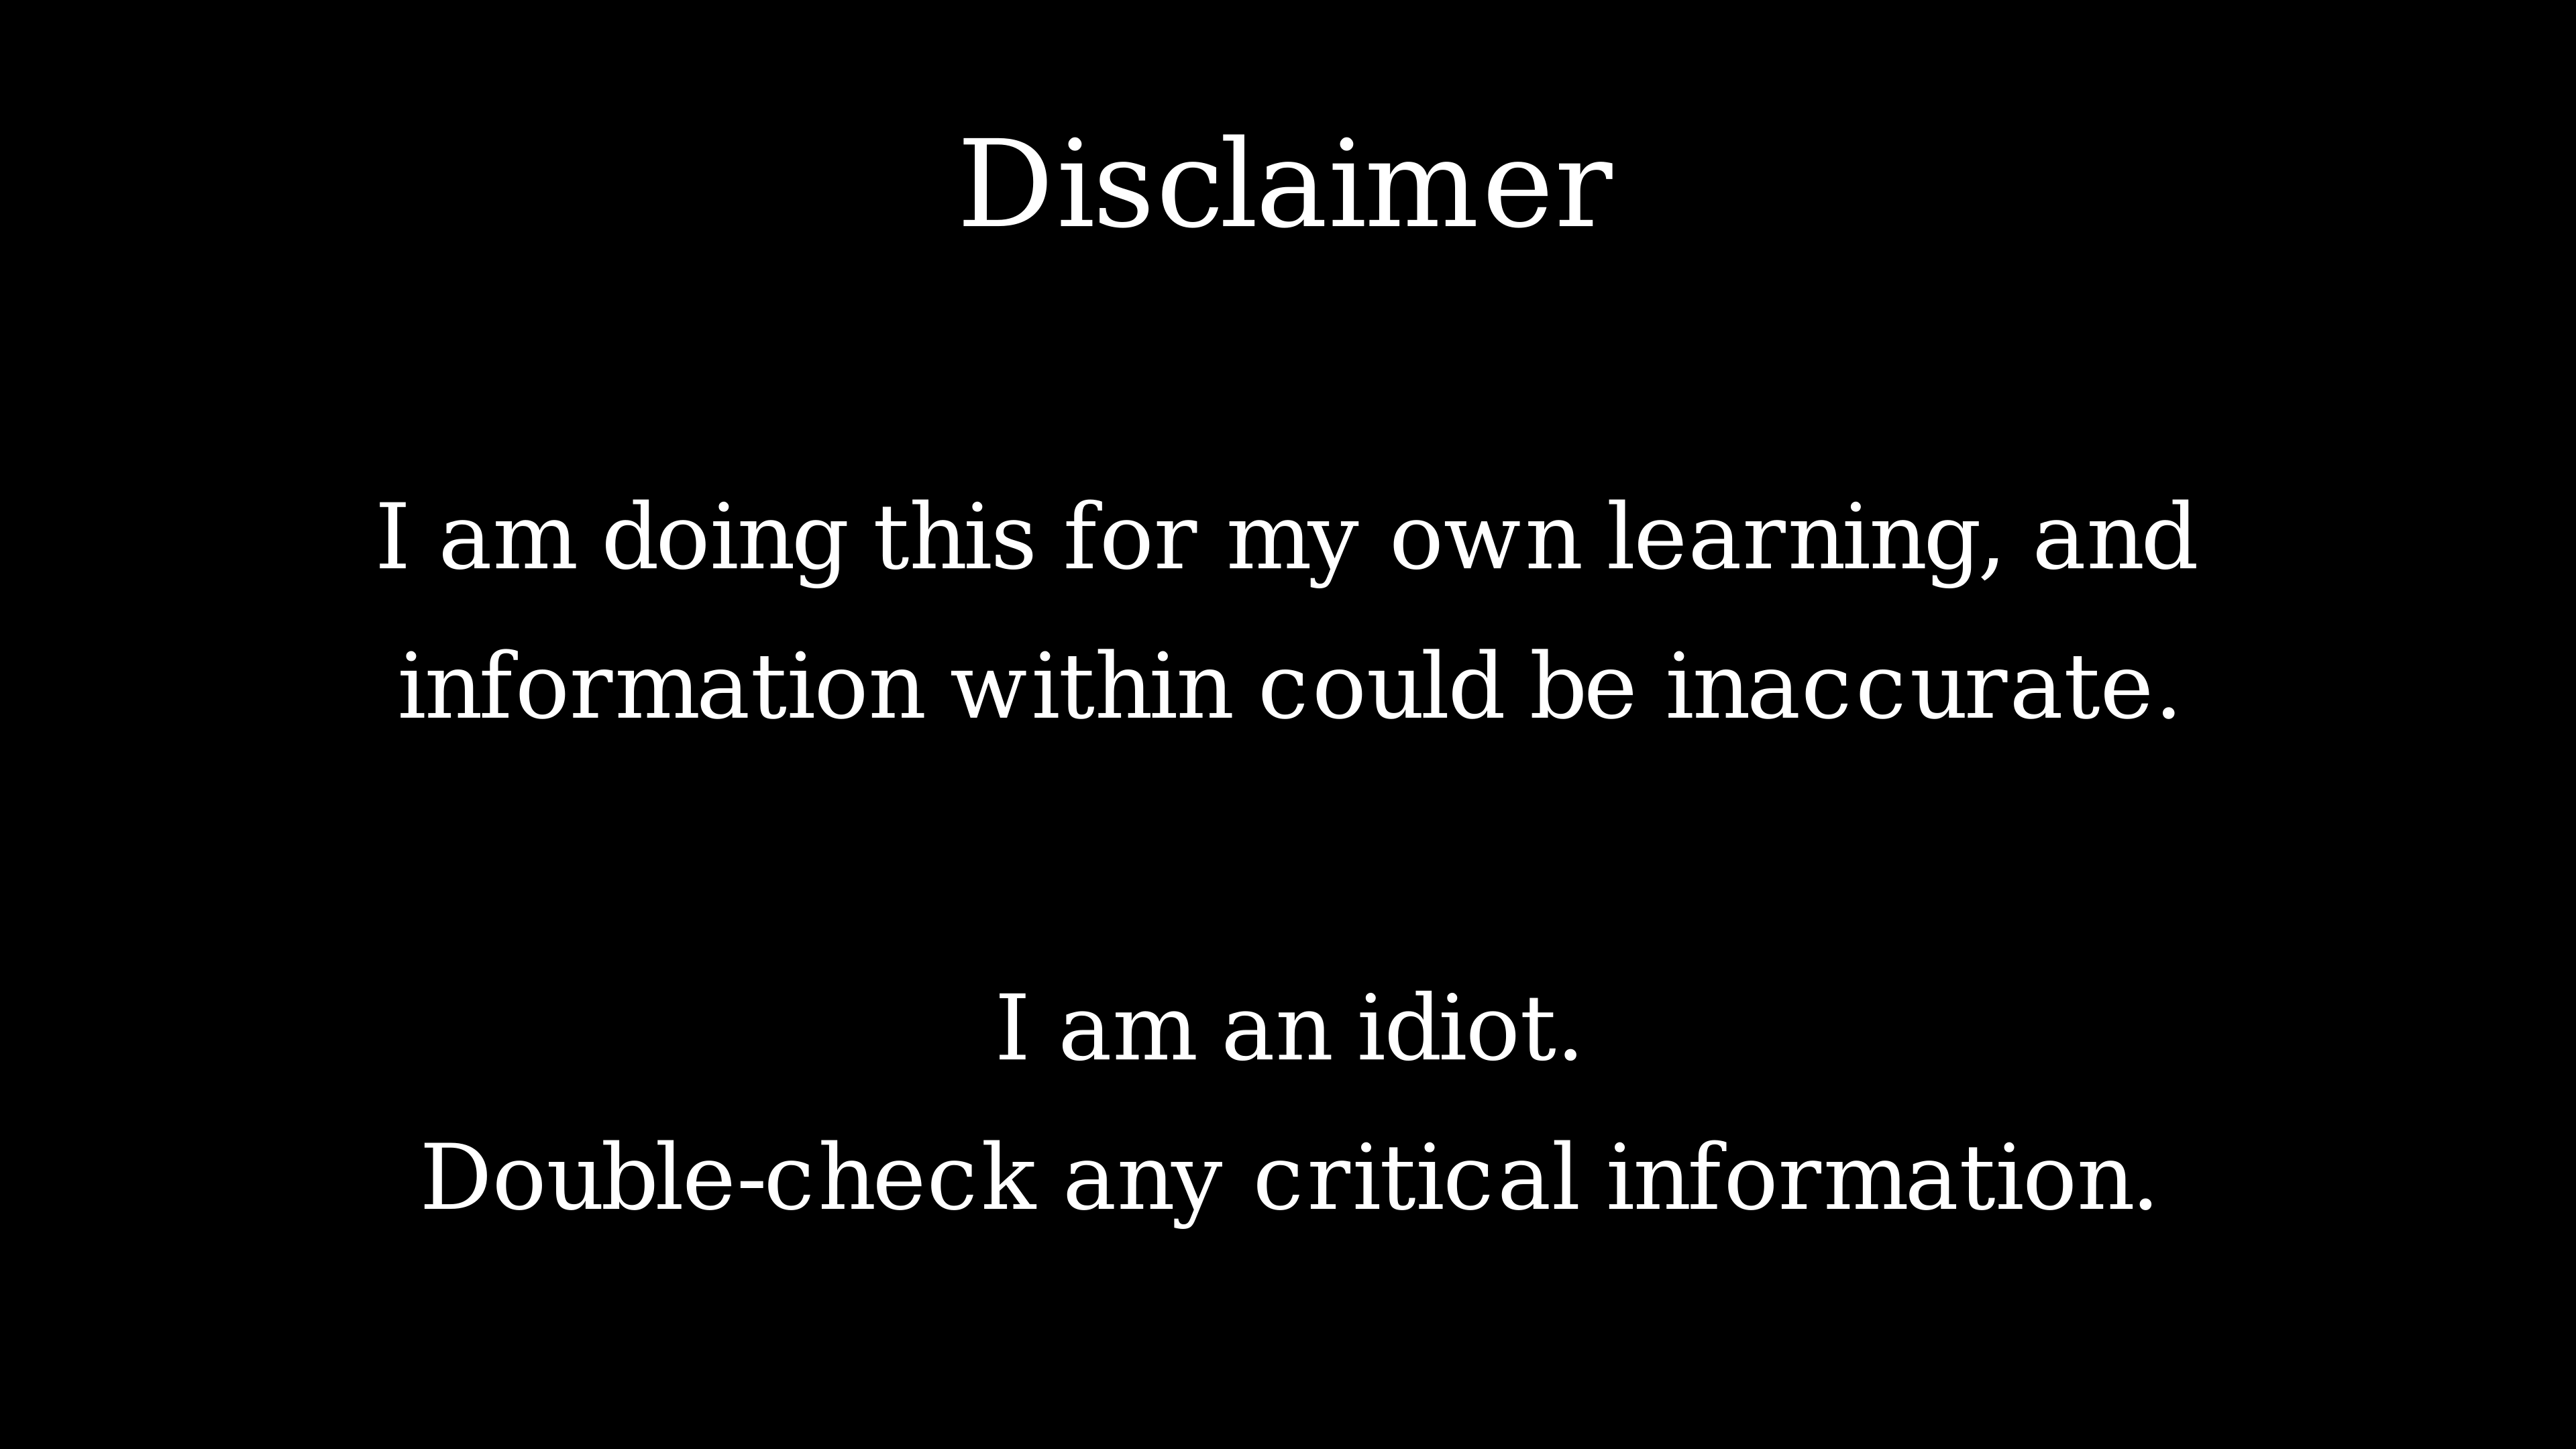

In [115]:
%%manim -s -qk -v WARNING Disclaimer

class Disclaimer(Scene):
    def construct(self):
        title = Text("Disclaimer", font_size=48)
        body = Paragraph(
            "I am doing this for my own learning, and",
            "information within could be inaccurate.",
            alignment="center",
            line_spacing=1.2,
            font_size=36,
        )
        title.shift(UP*3)
        footer = Paragraph(
            "I am an idiot.",
            "Double-check any critical information.",
            alignment="center",
            line_spacing=1.2,
            font_size=36,
        )

        # Position paragraph below title
        body.next_to(title, DOWN, buff=1.5)
        footer.next_to(body, DOWN, buff=1.5)

        self.play(Write(title), run_time=2)
        self.play(FadeIn(body, shift=DOWN), run_time=2)
        self.play(FadeIn(footer, shift=DOWN), run_time=2)
        self.wait(5)